# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [22]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
randstate=17

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=randstate)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [24]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,633,102,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
1,369,89,47,81,156,57,8,161,41,20,149,187,388,197,72,9,15,187,193
2,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
3,781,88,42,64,151,62,8,130,51,18,142,150,253,161,63,3,2,203,210
4,485,83,46,71,156,70,6,151,44,19,147,174,338,198,80,3,11,181,186
5,614,85,33,50,104,53,4,115,59,17,118,136,193,127,83,1,30,179,185
6,769,91,36,83,162,61,8,142,47,19,128,163,298,137,63,0,31,193,200
7,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
8,239,79,47,74,141,61,7,153,43,19,149,175,349,199,77,6,10,183,189
9,138,88,37,63,130,58,5,125,54,18,130,141,230,145,74,14,20,184,188


Methods `describe` and `info` deliver some useful information.

In [25]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.790528,93.561020,44.608379,81.571949,167.888889,61.612022,8.601093,167.442623,41.258652,20.469945,147.369763,187.562842,432.785064,173.426230,72.482696,6.506375,12.324226,188.974499,195.622951
std,244.676216,8.313564,6.089179,15.901522,33.487720,8.248906,4.942302,32.996777,7.807594,2.557640,14.360196,31.387009,174.949788,32.041552,7.964003,4.906652,8.510008,6.231197,7.527923
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,137.000000,167.000000,316.000000,149.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,405.000000,92.000000,44.000000,79.000000,167.000000,61.000000,8.000000,155.000000,43.000000,19.000000,145.000000,177.000000,358.000000,172.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,620.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,214.000000,576.000000,195.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,38.000000,206.000000,211.000000


In [26]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

As we can see after X_train.describe, there are a big difference in std and mean values. Because of it, it's necesasary to conduct normalization. In this case i use z-score standartization. It's mean that we subtract from each x the mean value and divide it by std. 
$$x = \frac{x_i - \mu}{\sigma}$$

Import from sklearn.preprocessing with StandardScaler which provide us with z-score standartization

In [27]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = pd.DataFrame(std_scaler.fit_transform(X_train_pd), columns=X_train_pd.columns)

In [28]:
X_train_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,3.154732e-17,7.425754e-16,4.853434e-18,-4.141597e-16,8.412619e-17,3.559185e-16,-3.882747e-17,1.132468e-16,6.471245e-17,-5.176996e-17,3.041485e-16,1.229537e-16,-2.264936e-17,2.734101e-16,-1.100112e-16,-6.794808e-17,-5.015215e-17,2.556142e-16,5.532915e-16
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.688628e+00,-2.475445e+00,-1.908133e+00,-2.616722e+00,-1.909570e+00,-1.773005e+00,-1.336849e+00,-1.681776e+00,-1.956117e+00,-1.357935e+00,-2.047086e+00,-1.835643e+00,-1.423334e+00,-1.918829e+00,-1.694499e+00,-1.327241e+00,-1.449525e+00,-2.084083e+00,-1.944266e+00
25%,-8.132046e-01,-7.899144e-01,-7.575047e-01,-7.283895e-01,-8.335689e-01,-5.596170e-01,-3.242524e-01,-6.504326e-01,-9.305392e-01,-5.752514e-01,-7.227771e-01,-6.557361e-01,-6.681435e-01,-7.630250e-01,-6.890625e-01,-7.152684e-01,-8.614452e-01,-7.990497e-01,-7.476271e-01
50%,-3.186919e-02,-1.879391e-01,-1.000026e-01,-1.618898e-01,-2.656793e-02,-7.426197e-02,-1.217330e-01,-3.774299e-01,2.232360e-01,-5.752514e-01,-1.651735e-01,-3.368424e-01,-4.278557e-01,-4.455247e-02,-1.863445e-01,-1.032959e-01,-1.557500e-01,4.096190e-03,1.830924e-01
75%,8.476445e-01,6.548263e-01,7.218750e-01,9.081652e-01,7.804331e-01,4.110930e-01,2.833058e-01,8.662489e-01,6.078277e-01,9.901167e-01,7.409322e-01,8.430644e-01,8.193525e-01,6.739201e-01,3.163736e-01,5.086766e-01,6.675611e-01,6.466129e-01,7.149320e-01
max,1.763975e+00,3.062728e+00,2.201255e+00,1.789387e+00,4.934994e+00,9.268822e+00,9.396678e+00,2.959269e+00,2.530786e+00,3.338169e+00,2.831946e+00,4.223338e+00,3.348096e+00,2.954290e+00,7.857144e+00,3.160557e+00,3.019879e+00,2.734792e+00,2.044531e+00


As we can see now we have data with $mean=0$ and $std=1$

Do the same with X_test

In [29]:
X_test_pd = pd.DataFrame(X_test)
X_test_std = pd.DataFrame(std_scaler.fit_transform(X_test_pd), columns=X_test_pd.columns)

y_train_pd = pd.DataFrame(y_train) # Delete
y_test_pd = pd.DataFrame(y_test) # Delete

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [30]:
### YOUR CODE HERE
# Import libraries
from sklearn import linear_model, preprocessing
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc_curve, plot_roc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [31]:
# Create a dictionary with hyperparameters as said in Note and find the optimum for C - inverse of regularization strength coefficient.
params_grid = {
    "solver": ["saga"],
    "C": np.arange(0.1, 100.1, 0.1),
    "tol": [1e-3],
    "max_iter": [500],
    "multi_class":['multinomial'],
    'random_state':[randstate]
}

lr = LogisticRegression()
grid = GridSearchCV(lr, params_grid, cv=5, n_jobs=-1)
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6....
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ]),
                         'max_iter': [500], 'multi_class': ['multinomial'],
                         'random_state': [17], 'solver': ['saga'],
                         'tol': [0.001]})

In [32]:
best_grid = grid.best_estimator_
best_grid

LogisticRegression(C=40.7, max_iter=500, multi_class='multinomial',
                   random_state=17, solver='saga', tol=0.001)

Look at the results of GridSearch for Logistic Regression

In [41]:
best_C_for_LR = grid.best_params_['C']
print('Mean cross-validated score of the best_estimator: {:.2f}'.format(grid.best_score_))
print('The score on the given data with best best parameters: {:.2f}'.format(best_grid.score(X_test_std, y_test)))
print('The best parametrs for logistic regression: {}'.format(grid.best_params_))

Mean cross-validated score of the best_estimator: 0.80
The score on the given data with best best parameters: 0.78
The best parametrs for logistic regression: {'C': 40.7, 'max_iter': 500, 'multi_class': 'multinomial', 'random_state': 17, 'solver': 'saga', 'tol': 0.001}


Best regularization strength coefficient for LogisticRegression is: $C=40.68$

Look at classification report

In [34]:
target_names = set(y_train)
y_pred = best_grid.predict(X_test_std)
print(classification_report(y_test, y_pred, target_names=target_names))
#['bus', 'opel', 'saab', 'van']

              precision    recall  f1-score   support

         van       0.92      0.96      0.94        75
        saab       0.67      0.51      0.58        83
         bus       0.59      0.71      0.65        70
        opel       0.94      0.97      0.96        69

    accuracy                           0.78       297
   macro avg       0.78      0.79      0.78       297
weighted avg       0.78      0.78      0.77       297



Accuracy and f1 shown below

In [35]:
print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

f1 for this model is: 0.77
accuracy for this model is: 0.78


Plot the ROC-curve for model

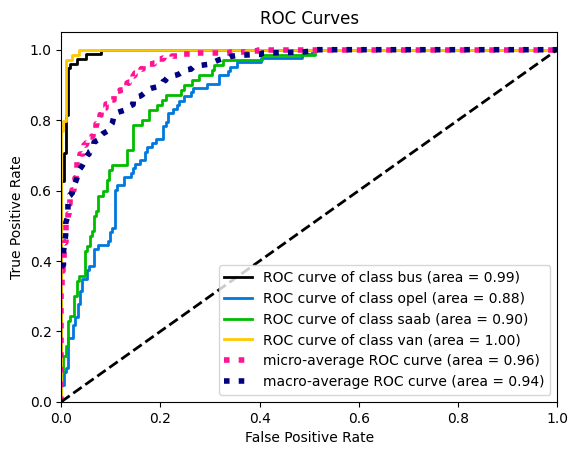

In [36]:
plot_roc(y_test, best_grid.predict_proba(X_test_std), title='ROC Curves');

In [122]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [37]:
### YOUR CODE HERE
#Import libraries
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Choose 4 components. Number of components should equal to the number of features of X_train data.
n_components = X_train_std.shape[1]
# Create object PCA
pca = PCA(n_components=n_components)
# Fit the model to X_train data
pca.fit(X_train_std)

PCA(n_components=19)

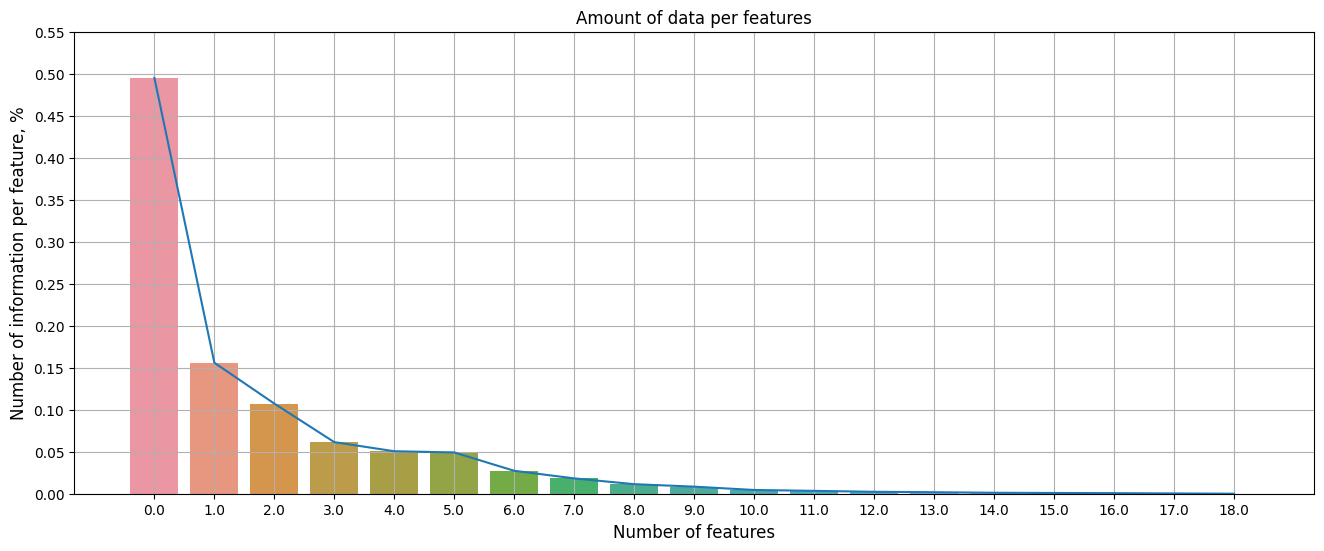

In [39]:
x = np.linspace(0, n_components-1, n_components)
y = pca.explained_variance_ratio_

fig = plt.figure(figsize=(16,6))
sns.barplot(x=x, y=y)
sns.lineplot(x=x, y=y)
plt.xlabel('Number of features', fontsize=12);
plt.ylabel('Number of information per feature, %', fontsize=12);
plt.title('Amount of data per features', fontsize=12)
plt.yticks(np.arange(0, 0.6, 0.05))
plt.grid()


In [274]:
# Find the upper limit of number of main components.
limit = 0.98 # 98% of data will be saved. If we choose all components that means that all data will be saved. 98% is a good price for dimension decrease.
best_n_components = y[np.cumsum(y) < limit].shape[0]
print(np.cumsum(y))
print(f'Best number of features which contains 98% of data - {best_n_components}')

[0.49513911 0.65109092 0.75841584 0.81985693 0.87043005 0.91957578
 0.9469015  0.96515599 0.97652389 0.98494396 0.98940164 0.99282518
 0.99513472 0.9969194  0.99806719 0.99896209 0.99963957 0.99998089
 1.        ]
Best number of features which contains 98% of data - 9


After PCA and explaided variance plot, we can define number of components which save about 98% data. Usually number of components which save 80% accepted.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

For PCA it's important to normalize the data before. Technique PCA involves finding the principal components of the data by maximizing the variance of the data along of each components. We substrac mean value, $\mu$ to shift the data to the center of coordinate frame, it helps to save data. Divide by std, $\sigma$ helps to exclude the situation when features with higher magnitude dominate over those with a smaller magnitude.

From the last cell we defined that best number of features are 9. These number of features help to save about 98% of data.

In [276]:
### YOUR CODE HERE
pca = PCA(n_components=best_n_components)
# Fit the model to X_train data
pca.fit(X_train_std)
# Transform the train and test data to new components
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

In [277]:
from sklearn.pipeline import Pipeline, make_pipeline

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [278]:
### YOUR CODE HERE
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('logreg', LogisticRegression())
    ])

# Define the hyperparameters to search over
param_grid = {
    'pca__n_components':[best_n_components],
    "logreg__solver": ["saga"],
    "logreg__C": np.arange(0.01, 100.01, 0.01),
    "logreg__tol": [1e-3],
    "logreg__multi_class":['multinomial'],
    "logreg__random_state":[randstate]
    }

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_pd, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.000e-02, 2.000e-02, 3.000e-02, ..., 9.998e+01, 9.999e+01,
       1.000e+02]),
                         'logreg__multi_class': ['multinomial'],
                         'logreg__random_state': [17],
                         'logreg__solver': ['saga'], 'logreg__tol': [0.001],
                         'pca__n_components': [9]})

Best parameters for solution after GridSearchCV:
1. For PCA better to use 9 features for standtized data: X_train and X_test
2. For Logistic Regression better use C=0.31 with PCA(num_features=9)

In [279]:
best_grid=grid.best_estimator_
best_grid

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('logreg',
                 LogisticRegression(C=0.31, multi_class='multinomial',
                                    random_state=17, solver='saga',
                                    tol=0.001))])

Look at the f1 score and accuracy

In [280]:
y_pred = best_grid.predict(X_test_pd)
print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

f1 for this model is: 0.65
accuracy for this model is: 0.66


In [281]:
print(classification_report(y_test, y_pred, target_names=['bus', 'opel', 'saab', 'van']))

              precision    recall  f1-score   support

         bus       0.74      0.85      0.79        75
        opel       0.56      0.37      0.45        83
        saab       0.49      0.53      0.51        70
         van       0.81      0.93      0.86        69

    accuracy                           0.66       297
   macro avg       0.65      0.67      0.65       297
weighted avg       0.65      0.66      0.65       297



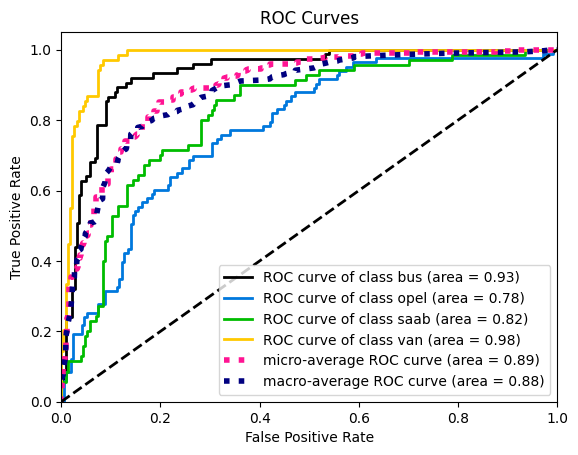

In [282]:
plot_roc(y_test, best_grid.predict_proba(X_test_pd), title='ROC Curves');

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [283]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

Check the basic Decision tree classifier on standartized data

In [284]:
tree = DecisionTreeClassifier(random_state=randstate)
tree.fit(X_train_std, y_train)
print("The mean accuracy on the X_trai`n_std, y_train: {:.4f}".format(tree.score(X_train_std, y_train)))
print("The mean accuracy on the X_test_std, y_test: {:.4f}".format(tree.score(X_test_std, y_test)))

y_pred = tree.predict(X_test_std)
print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

The mean accuracy on the X_trai`n_std, y_train: 1.0000
The mean accuracy on the X_test_std, y_test: 0.6128
f1 for this model is: 0.61
accuracy for this model is: 0.61


Check the basic Decision tree classifier on initial data

In [285]:
tree = DecisionTreeClassifier(random_state=randstate)
tree.fit(X_train_pd, y_train)
print("The mean accuracy on the X_train_std, y_train: {:.4f}".format(tree.score(X_train_pd, y_train)))
print("The mean accuracy on the X_test_std, y_test: {:.4f}".format(tree.score(X_test_pd, y_test)))

y_pred = tree.predict(X_test_pd)
print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

The mean accuracy on the X_train_std, y_train: 1.0000
The mean accuracy on the X_test_std, y_test: 0.6936
f1 for this model is: 0.69
accuracy for this model is: 0.69


Conclusion: as we can for this data, there is no difference between standartized data or not. Score is approximately the same.

If you do not limit the depth, the tree can be arbitrarily deep and complex. Therefore, uncut trees are prone to overfitting and poorly generalize the result on new data. Now let's apply pre-pruning to the tree, which will stop the process of building the tree before we perfectly fit the model to the training data. One of the options is to stop the process of building a tree after reaching a certain depth. Here we will vary $max_{depth}=4$

In [286]:
tree = DecisionTreeClassifier(random_state=randstate, max_depth=4)
tree.fit(X_train_pd, y_train)
print("The mean accuracy on the X_train_std, y_train: {:.4f}".format(tree.score(X_train_pd, y_train)))
print("The mean accuracy on the X_test_std, y_test: {:.4f}".format(tree.score(X_test_pd, y_test)))

y_pred = tree.predict(X_test_pd)
print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

The mean accuracy on the X_train_std, y_train: 0.7413
The mean accuracy on the X_test_std, y_test: 0.6667
f1 for this model is: 0.64
accuracy for this model is: 0.67


<AxesSubplot: >

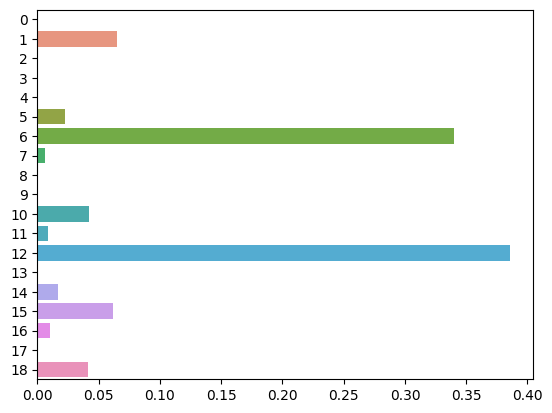

In [287]:
sns.barplot(y=X_train_pd.columns, x=tree.feature_importances_, orient='h')

When the feature has small informativeness, it doesn't mean that it is useless. It could mean that the information includes in other feature.

In [288]:
# create a dictionary with hyperparameters
params_grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'],
    "max_depth": np.arange(1, 31),
    "random_state": [randstate]
}

In [289]:
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, params_grid, cv=5, n_jobs=-1)
grid.fit(X_train_pd, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'random_state': [17], 'splitter': ['best', 'random']})

In [290]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=17)

In [291]:
best_grid = grid.best_estimator_
y_pred = best_grid.predict(X_test_pd)

best_depth_DT = grid.best_params_['max_depth']
print('Best combination of parameters is: {}'.format(grid.best_params_))
print('Best values are: {:.2f}'.format(grid.best_score_))

print('f1 for this model is: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('accuracy for this model is: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Best combination of parameters is: {'criterion': 'entropy', 'max_depth': 6, 'random_state': 17, 'splitter': 'best'}
Best values are: 0.72
f1 for this model is: 0.71
accuracy for this model is: 0.71


In [292]:
print(classification_report(y_test, y_pred, target_names=['bus', 'opel', 'saab', 'van']))

              precision    recall  f1-score   support

         bus       0.88      0.95      0.91        75
        opel       0.67      0.48      0.56        83
        saab       0.49      0.59      0.54        70
         van       0.81      0.86      0.83        69

    accuracy                           0.71       297
   macro avg       0.71      0.72      0.71       297
weighted avg       0.71      0.71      0.71       297



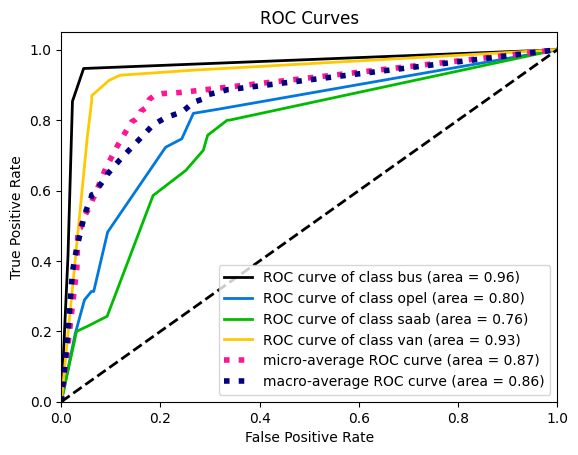

In [293]:
plot_roc(y_test, best_grid.predict_proba(X_test_pd), title='ROC Curves');

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [294]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

Create a function which takes classificator, min and max of models in ensemble and plot the chart with accuracy and f1 by number of estimators

In [298]:
def plot_accuracy2(clf, X_train, y_train, Nmin=2, Nmax=100, cv=5):

    # Define array with number of estimators
    n_estimators = np.arange(Nmin, Nmax, 2)

    # Create empty lists for accuracy and f1
    accuracy_with_cv = []
    f1_with_cv = []

    # Create scorers to calculate f1 and accuracy inside make_scorer
    f1_scorer = make_scorer(f1_score, average='weighted')
    accuracy_scorer = make_scorer(accuracy_score)

    # Number of subsets for Bagging
    max_samples = Nmax

    for num in n_estimators:
        bag_clf = BaggingClassifier(clf, random_state=randstate,  n_estimators=num, max_samples=max_samples, n_jobs=-1)

        accuracy_with_cv.append(cross_val_score(bag_clf, X_train, y_train, scoring=accuracy_scorer, cv=cv).mean())
        f1_with_cv.append(cross_val_score(bag_clf, X_train, y_train, scoring=f1_scorer, cv=cv).mean())


    fig = plt.figure(figsize=(16,6))
    plt.plot(n_estimators, accuracy_with_cv, label='accuracyCV')
    plt.plot(n_estimators, f1_with_cv, label='f1CV')
    plt.xticks(n_estimators)
    plt.legend()
    plt.title('f1 and accuracy by number of models in ensemble')
    plt.xlabel('Number of estimators')
    plt.ylabel('f1 and accuracy')
    plt.grid()

Create Logistic Regression Classifier and plot the metrics for different number of estimators

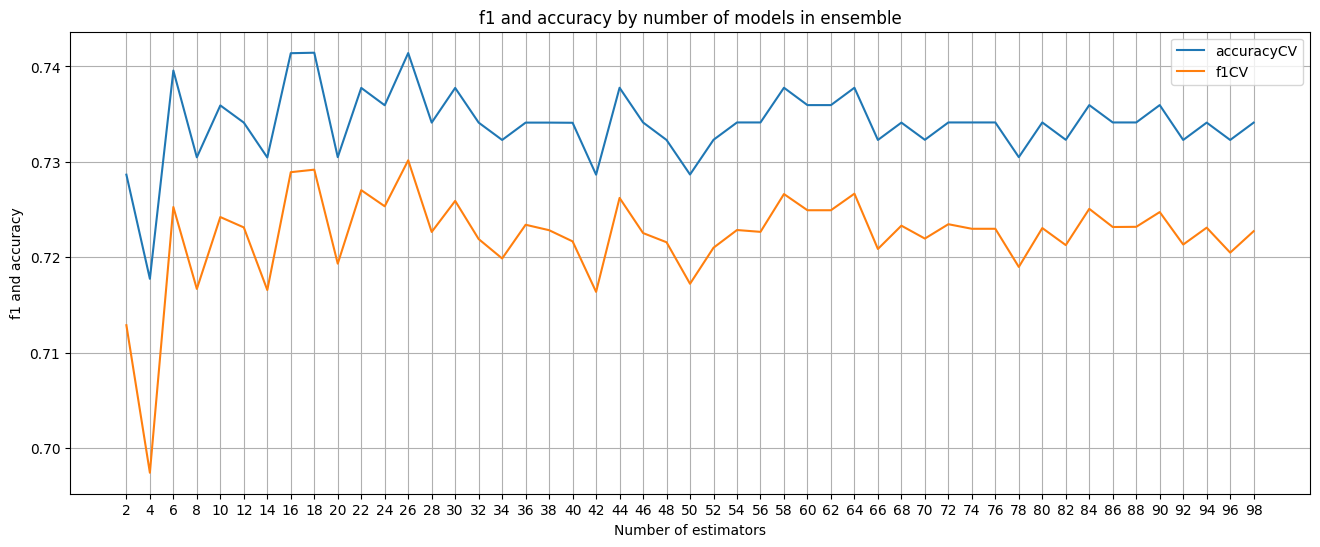

In [299]:
lr = LogisticRegression(random_state=randstate)
plot_accuracy2(lr, X_train_std, y_train, Nmin=2, Nmax=100, cv=5)

From the above figure it can be noticed that 16-18 number of estimators in ensemble shows the accuracy and f1 score. That's why 16 should be used for this data and model.

Check 16 estimators for BaggingClassifier with LinearRegression model

In [317]:
lr = LogisticRegression(random_state=randstate)
bagging_lrs = BaggingClassifier(lr, random_state=randstate,  n_estimators=16, max_samples=100, n_jobs=-1)
print("accuracy for Logistic regression with bagging:", cross_val_score(bagging_lrs, X_train_std, y_train, scoring='accuracy', cv=5).mean())

bagging_lrs.fit(X_train_std, y_train)
y_pred = bagging_lrs.predict(X_test_std)
print("f1 for Logistic regression with bagging on test data:", f1_score(y_test, y_pred, average='weighted'))
print("accuracy for Logistic regression with bagging on test data:", accuracy_score(y_test, y_pred))

accuracy for Logistic regression with bagging: 0.7413844870725604
f1 for Logistic regression with bagging on test data: 0.7383112781562394
accuracy for Logistic regression with bagging on test data: 0.7575757575757576


Create DecisionTree Classifier and plot the metrics for different number of estimators

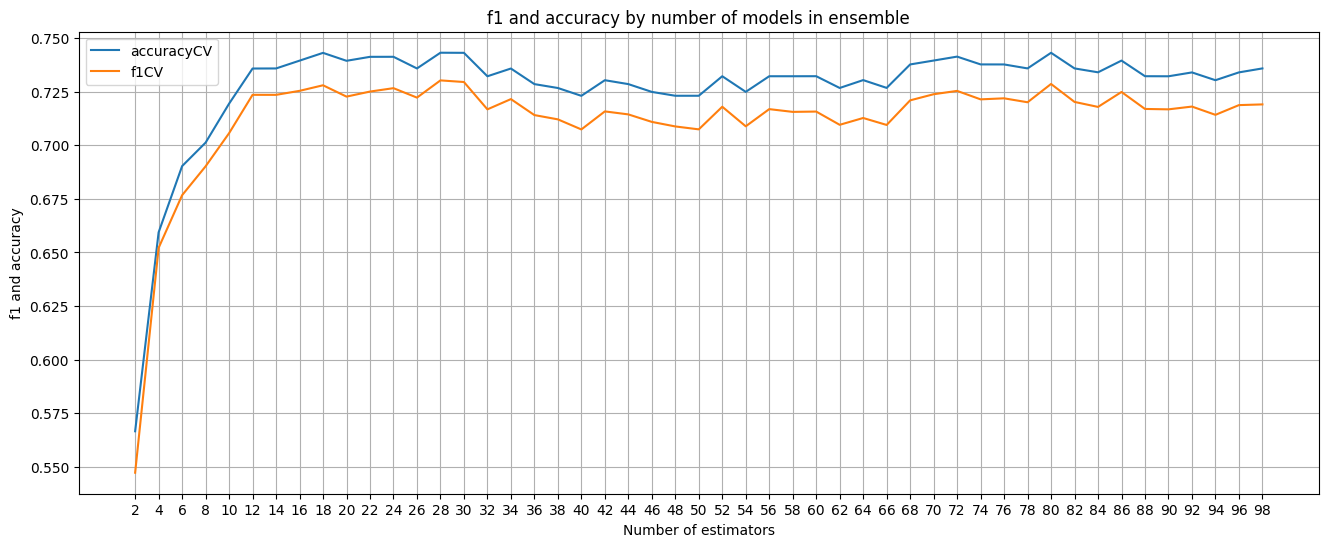

In [301]:
tree = DecisionTreeClassifier(random_state=randstate)
plot_accuracy2(tree, X_train_std, y_train, Nmin=2, Nmax=100, cv=5)

From the above figure it can be noticed that 28-30 number of estimators in ensemble shows the accuracy and f1 score. That's why 28 should be used for this data and model.

Check 28 estimators for BaggingClassifier with DecisionTree model

In [315]:
dt = DecisionTreeClassifier(random_state=randstate)
bagging_dt = BaggingClassifier(dt, random_state=randstate,  n_estimators=28, max_samples=100, n_jobs=-1)
print("accuracy for Decision tree with bagging:", cross_val_score(bagging_dt, X_train_std, y_train, scoring='accuracy', cv=5).mean())

bagging_dt.fit(X_train_std, y_train)
y_pred = bagging_dt.predict(X_test_std)
print("f1 for Decision tree with bagging on test data:", f1_score(y_test, y_pred, average='weighted'))
print("accuracy for Decision tree with bagging on test data:", accuracy_score(y_test, y_pred))

accuracy for Decision tree with bagging: 0.7432026688907423
f1 for Decision tree with bagging on test data: 0.6499423409352836
accuracy for Decision tree with bagging on test data: 0.6666666666666666


The hyperparameters found with GridSearchCV for a single decision tree may not necessarily be optimal for decision trees used in an ensemble, as the requirements for hyperparameters may differ between the two scenarios.

The optimal hyperparameters for a single decision tree may not be the same as the optimal hyperparameters for an ensemble of decision trees. For example, a single decision tree may benefit from a deeper tree with more splits, while an ensemble may benefit from shallow trees with fewer splits to prevent overfitting. Especially when max_sample parameter used, it means that max_depth for all trees could be different as we take subsets from train data.

Therefore, it is recommended to perform a separate hyperparameter tuning process for decision trees used in an ensemble, even if the hyperparameters found with GridSearchCV for a single decision tree were deemed optimal.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [318]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(X_train_std.shape[1])),
    max_depth=30)


In [319]:
# YOUR CODE HERE
random_forest = RandomForestClassifier(random_state=randstate, n_jobs=-1)

In [307]:
def plot_accuracy_rf(clf, X_train, y_train, Nmin=2, Nmax=100, cv=5):

    # Define array with number of estimators
    n_estimators = np.arange(Nmin, Nmax, 2)

    # Create empty lists for accuracy and f1
    accuracy_with_cv = []
    f1_with_cv = []

    # Create scorers to calculate f1 and accuracy inside make_scorer
    f1_scorer = make_scorer(f1_score, average='weighted')
    accuracy_scorer = make_scorer(accuracy_score)


    for num in n_estimators:
        rf = clf(n_estimators=num, n_jobs=-1, random_state=randstate)
        accuracy_with_cv.append(cross_val_score(rf, X_train, y_train, scoring=accuracy_scorer, cv=cv).mean())
        f1_with_cv.append(cross_val_score(rf, X_train, y_train, scoring=f1_scorer, cv=cv).mean())


    fig = plt.figure(figsize=(16,6))
    plt.plot(n_estimators, accuracy_with_cv, label='accuracyCV')
    plt.plot(n_estimators, f1_with_cv, label='f1CV')
    plt.xticks(n_estimators)
    plt.legend()
    plt.title('f1 and accuracy by number of models in ensemble')
    plt.xlabel('Number of estimators')
    plt.ylabel('f1 and accuracy')
    plt.grid()

Create Random Forest Classifier and plot the metrics for different number of estimators

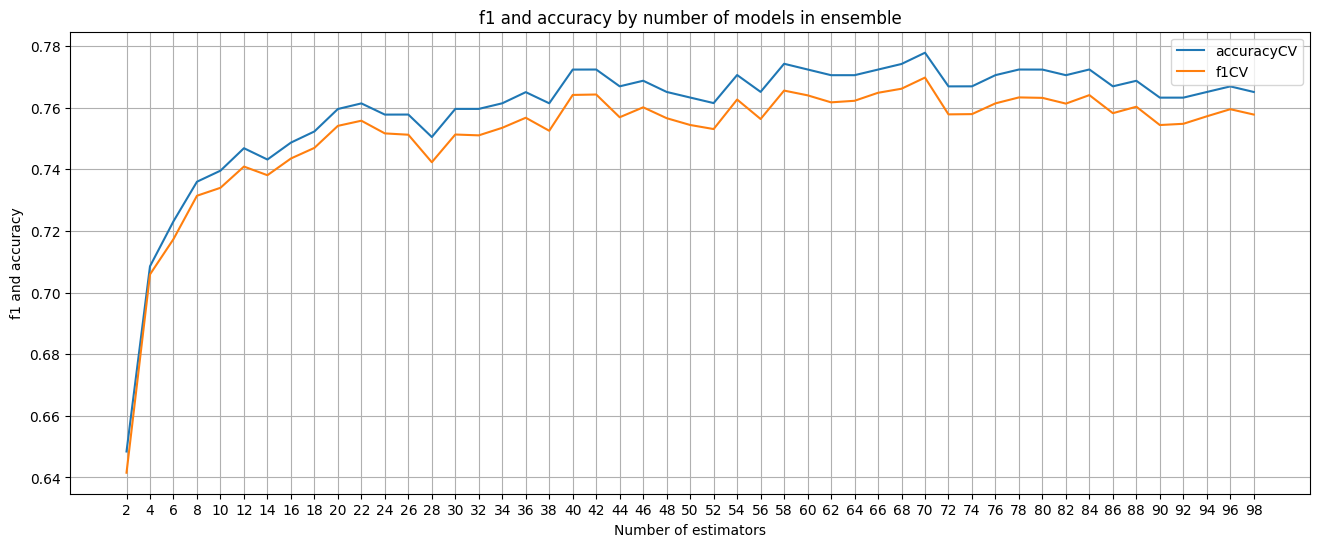

In [308]:
plot_accuracy_rf(RandomForestClassifier, X_train_std, y_train, Nmin=2, Nmax=100, cv=5)

From the above figure it can be noticed that 72 number of estimators in ensemble shows the accuracy and f1 score. That's why 72 should be used for this data and model.

Check 72 estimators for RandomForest

In [323]:
rf = RandomForestClassifier(n_estimators=72, n_jobs=-1, random_state=randstate)
print("accuracy for RandomForest on cross validation:", cross_val_score(rf, X_train_std, y_train, scoring='accuracy', cv=5).mean())
best_n_estim_RF = 70
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
print("f1 for RandomForest on test data:", f1_score(y_test, y_pred, average='weighted'))
print("accuracy for RandomForest on test data:", accuracy_score(y_test, y_pred))

accuracy for RandomForest on cross validation: 0.766905754795663
f1 for RandomForest on test data: 0.6956470300498822
accuracy for RandomForest on test data: 0.7037037037037037


Optimal number of estimators = 58. It differs from the number which i got with Bagging with Decision Tree, where the optimal number is 36

Random Forest model uses a random subset of the features and a random subset of training data that adds randomness into the model. The final prediction is made by averaging the predictions of all trees in the ensemble. As a result, adding more trees to the ensemble may reduce overfitting and improve the generalization performance, up to a certain point where adding more trees does not provide significant improvement in performance.

The opposite situation is with Decision Tree and Logistic Regression. In a Bagging ensemble of logistic regressions or decision trees, each model in the ensemble is trained using a bootstrapped sample of the training data, and the final prediction is made by averaging the predictions of all models in the ensemble.

The optimal number of trees in a Random Forest may be larger than the optimal number of logistic regressions or decision trees in a Bagging ensemble, as Random Forest can handle larger ensembles without overfitting due to its random feature and data sampling, while Bagging may reach its optimal performance with a smaller number of models.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [348]:
# YOUR CODE HERE
a = X_train_pd.shape[0]

num = np.full(shape=(30,), fill_value=a//30)
list_of_indeces = np.cumsum(num)
list_of_indeces[-1] = a
list_of_indeces

array([ 18,  36,  54,  72,  90, 108, 126, 144, 162, 180, 198, 216, 234,
       252, 270, 288, 306, 324, 342, 360, 378, 396, 414, 432, 450, 468,
       486, 504, 522, 549])

Import next 3 models with next hyperparams:
1. LogisticRegression - best params: {'C': 40.68, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 0.001}
2. Decision tree - max_depth = 6
3. Random Forest - n_estimators = 70

In [354]:
rf = RandomForestClassifier(n_estimators=best_n_estim_RF, random_state=randstate)
dt = DecisionTreeClassifier(max_depth=best_depth_DT, random_state=randstate)
lr = LogisticRegression(solver='saga', C=best_C_for_LR, tol=1e-3, max_iter=500, multi_class='multinomial', random_state=randstate)


In [355]:
def plot_accuracy_lc(clf_list, X_train, y_train, X_test, y_test, list_of_indeces):
    clases = ['linear regression', 'decision tree', 'random forest']

    fig = plt.figure(figsize=(16, 10))
    
    for i, clf in enumerate(clf_list):
        acc_list=[]
        f1_list = []
        for n in list_of_indeces:
            X_train_batch = X_train.sample(n=n, random_state=7)
            y_train_batch = y_train.sample(n=n, random_state=7)
            clf.fit(X_train_batch, y_train_batch.values.ravel())
            y_pred = clf.predict(X_test)
            f1_list.append(f1_score(y_test, y_pred, average='weighted'))
            acc_list.append(accuracy_score(y_test, y_pred))
        plt.plot(list_of_indeces, f1_list, label=(clases[i] + ' f1'), linestyle='dashed')
        plt.plot(list_of_indeces, acc_list, label=(clases[i] + ' accuracy'))
    plt.grid()
    plt.legend()
    plt.xlabel('Number of objects')
    plt.ylabel('f1 and accuracy')
    plt.title('Dependence of score and number of object for LogisticRegresion, DecisionTree and RandomForest models')

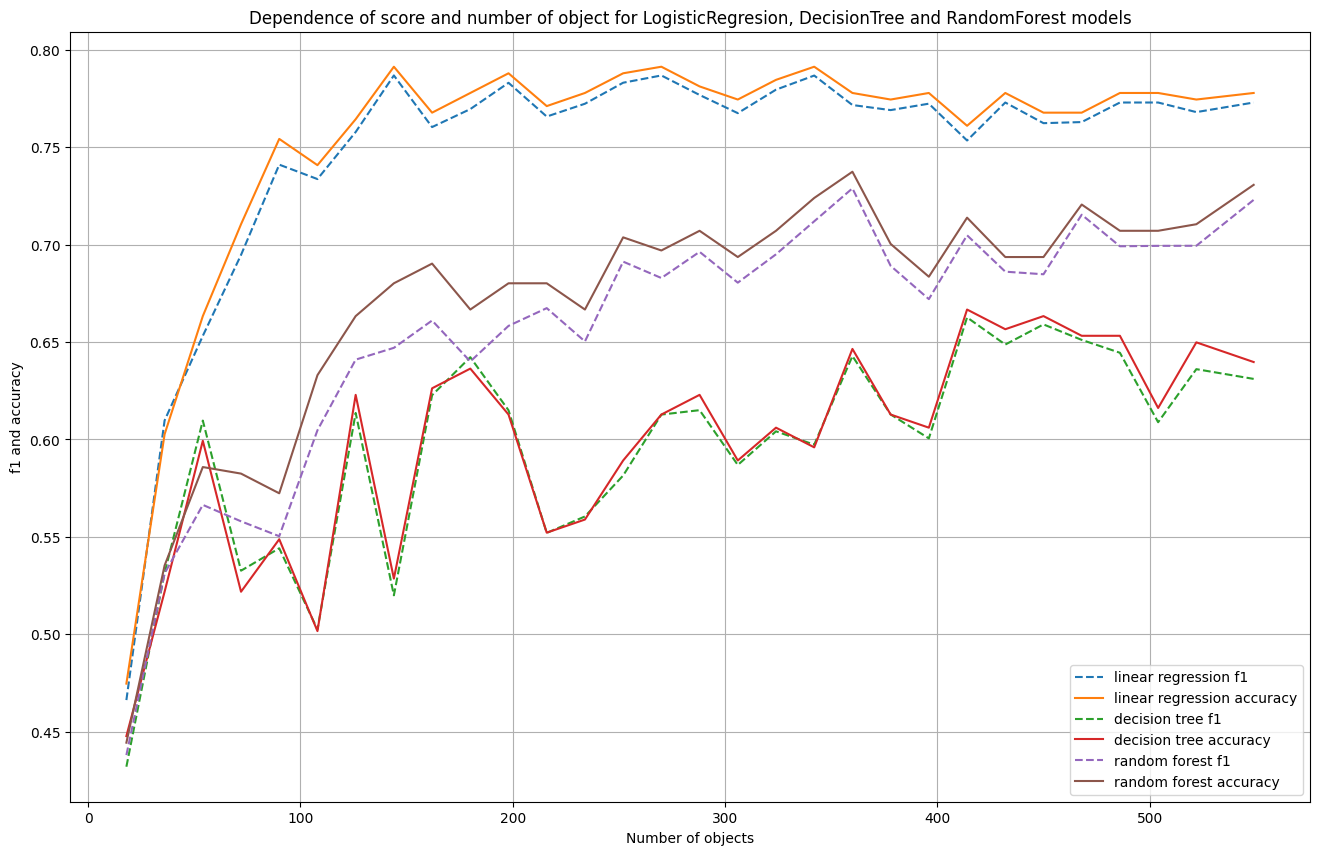

In [356]:
clf_list = [lr, dt, rf]
plot_accuracy_lc(clf_list, X_train_std, y_train_pd, X_test_std, y_test_pd, list_of_indeces)

Coclusion:
1. For logistic regression models, the performance of F1 score and accuracy metrics can depend on the number of objects used for training. As we can see, increasing the number of objects used for training a logistic regression model can help improve its accuracy and F1 score, as it allows the model to learn from more data and capture more complex relationships between the features and the target variable.

2. For decision tree models, increasing the number of objects used for training can also improve the accuracy and F1 score. However, using too many objects can lead to overfitting, where the model becomes too complex and starts to memorize the training data instead of generalizing to unseen data. As we can see, after 300 objects f1 and accuracy decreased which could be a reason for overfitting.

3. Similarly, for random forest model as for decision tree. As we can see after 300 objects Random forest model stops the increasing of f1 and accuracy. It oscilates around 0.7 and following increasing the number of object doesn't give any positive results. This is why it's better to use for tree models bagging.